In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import interpolate

In [5]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

In [6]:
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [9]:
month=list(range(1,13))

In [53]:
df1=pd.DataFrame({'Temperature':Max},index=month)
df2=pd.DataFrame({'Temperature':Min},index=month)

Text(0, 0.5, 'Temperature ($^\\circ$C)')

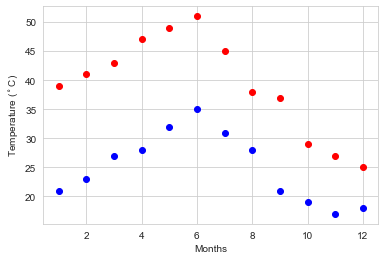

In [73]:
sns.set_style('whitegrid')
plt.plot(df1,'ro')
plt.plot(df2,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')


In [46]:
x=np.arange(1,13)

In [48]:
from scipy import optimize

In [49]:
# fitting it to the periodic function(chose cos)

In [50]:
def yearly_temps(time, average, amplification, time_offset):
    return (average
            + amplification * np.cos((time + time_offset) * 1.8 * np.pi / time.max()))



In [51]:
res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min, [-40, 20, 0])

In [47]:
# plotting the fit

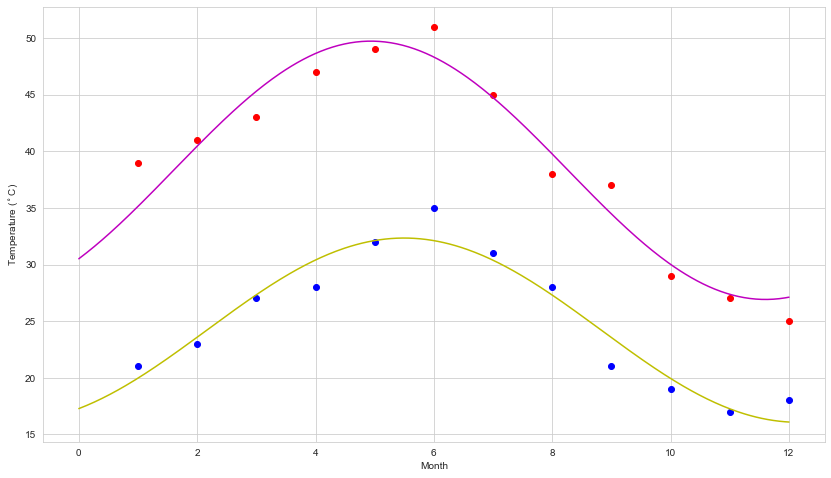

In [55]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(14,8))
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [15]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [16]:
titanic = pd.read_csv(url)

In [17]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
data=titanic['sex'].value_counts()

In [22]:
data

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x226bb7ce408>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

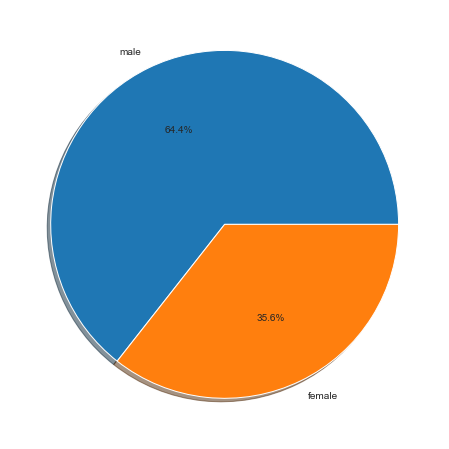

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
plt.pie(x=data,labels=['male','female'],shadow=True,autopct='%1.1f%%')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<AxesSubplot:xlabel='fare', ylabel='age'>

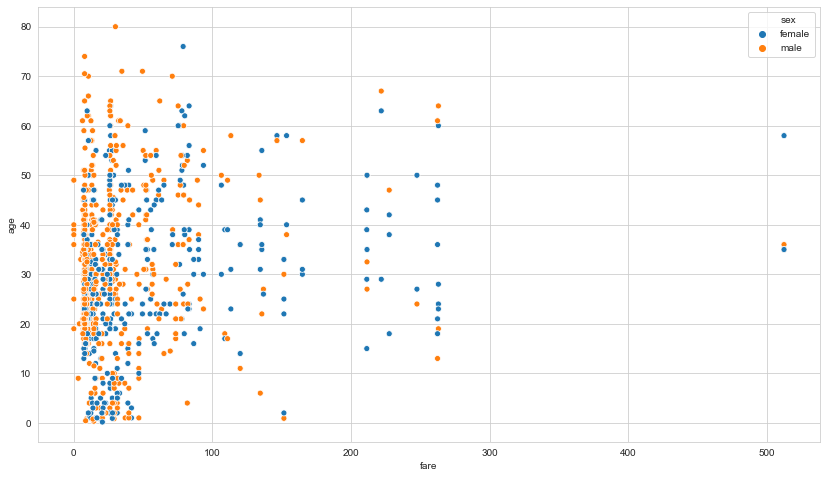

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.scatterplot(x='fare',y='age',data=titanic,hue='sex')